
Import & Initialize


In [1]:
import xml.etree.ElementTree as et
from os import listdir
from torch.utils.data import Dataset
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
import json
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
topology = et.parse('Files/topology-anonymised.xml')
root = topology.getroot()


Get list of nodes in the network topology

In [2]:
list_node = []
for node in root[1][0]:
    list_node.append(int(node.attrib['id']))
list_node.sort()
print(list_node)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Get topology

In [3]:
n = len(list_node)
topo_matrix = [[0 for i in range(n)] for i in range(n)]

for link in root[1][1]:
     fr = int(link[0].attrib['node'])-1
     to = int(link[1].attrib['node'])-1
     topo_matrix[fr][to] = 1
     
for i in range(len(topo_matrix)):
     print(i+1, topo_matrix[i])


1 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
2 [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
3 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
4 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
5 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
6 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
7 [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
8 [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
10 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
11 [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
12 [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
13 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
14 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

Calculate min distance by Dijkstra

In [4]:
import sys
 
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex tDistance from Source")
        for node in range(self.V):
            print(node, "t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
        min = sys.maxsize
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
             u = self.minDistance(dist, sptSet)
             sptSet[u] = True
             for v in range(self.V):
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]:
                    dist[v] = dist[u] + self.graph[u][v]
 
        # self.printSolution(dist)
        return dist
 
 
# Driver program
g = Graph(23)
g.graph = topo_matrix
 
M = [g.dijkstra(i) for i in range(23)] #Dijkstra distance matrix
M

[[0, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 3, 3, 2, 3, 1, 2, 3, 2, 3, 2, 4, 3],
 [2, 0, 3, 1, 3, 2, 1, 4, 3, 2, 3, 1, 1, 2, 4, 2, 2, 1, 2, 3, 2, 2, 1],
 [1, 3, 0, 3, 3, 3, 2, 4, 3, 1, 1, 2, 2, 1, 4, 2, 2, 2, 3, 3, 1, 3, 3],
 [2, 1, 3, 0, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 1, 3, 2, 3, 4, 3, 3, 2],
 [2, 3, 3, 2, 0, 4, 3, 1, 2, 2, 3, 3, 4, 4, 3, 1, 3, 4, 4, 4, 4, 4, 4],
 [2, 2, 3, 3, 4, 0, 1, 5, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 1, 3, 2, 4, 3],
 [1, 1, 2, 2, 3, 1, 0, 4, 3, 2, 3, 2, 2, 3, 3, 2, 1, 2, 1, 2, 1, 3, 2],
 [3, 4, 4, 3, 1, 5, 4, 0, 1, 3, 4, 4, 5, 5, 2, 2, 4, 5, 5, 3, 5, 4, 5],
 [2, 3, 3, 2, 2, 4, 3, 1, 0, 2, 3, 3, 4, 4, 1, 1, 3, 4, 4, 2, 4, 3, 4],
 [2, 2, 1, 2, 2, 3, 2, 3, 2, 0, 1, 1, 2, 2, 3, 1, 1, 3, 3, 2, 2, 2, 2],
 [2, 3, 1, 3, 3, 4, 3, 4, 3, 1, 0, 2, 3, 2, 4, 2, 2, 3, 4, 3, 2, 3, 3],
 [3, 1, 2, 2, 3, 3, 2, 4, 3, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 2],
 [3, 1, 2, 2, 4, 2, 2, 5, 4, 2, 3, 2, 0, 1, 3, 3, 1, 2, 1, 2, 3, 3, 2],
 [2, 2, 1, 3, 4, 3, 3, 5, 4, 2, 2, 3, 1, 0, 4, 3, 2, 3, 2, 3, 2,

## Heuristic method 

In [5]:
#Calculating the subgraph
T = 1
V = [[[] for i in range(n)] for j in range(n)]
E = [[[] for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(n):
        for v in range(n):
            if M[i][v]+ M[v][j] <= M[i][j] + T:
                V[i][j].append(v)
        for u in V[i][j]:
            for v in V[i][j]:
                if topo_matrix[u][v] == 1 and M[i][u]+ M[v][j] <= M[i][j] + T:
                    E[i][j].append((u,v))

        


In [6]:
def connect(list_of_edges, start, end):
    result = []
    if list_of_edges != []:
        result.append(start)
        for e in list_of_edges:
            if e[0] == start:
                cur = e
                break


            
        while cur[1] != end:
            for e in list_of_edges:
                if e[0] == cur[1]:
                    result.append(e[0])
                    cur = e
                    break
        result.append(end)

    return(result)


In [7]:
from pulp import *
Z = 10000

def solve_lp(W):
    prob = LpProblem('Maximum_flow', LpMaximize)
    r_E = [[0 for i in range (n)] for j in range(n)]

    objective = []
    rate = [[0 for i in range (n)] for j in range (n)]

    for i in range(n):
        for j in range(n):
            if i!=j:
                #List of variable
                r_E[i][j] = LpVariable.dicts(f'Rate {i}_{j} on edge', E[i][j], lowBound=0, cat="continuous")
                for e in E[i][j]: 
                    #rate on edge <= capacity
                    prob += r_E[i][j][e] <= Z

                for v in V[i][j]: 
                        v_in = []
                        v_out = []
                        for e in E[i][j]:
                            if e[0] == v:
                                v_out.append(r_E[i][j][e])
                            if e[1] == v:
                                v_in.append(r_E[i][j][e])
                        if v == i:
                            prob += lpSum(v_in) == 0
                            prob += lpSum(v_out) <= W[i][j]
                            prob += lpSum(v_out) >= min(10, W[i][j])
                            objective.append(v_out)
                            rate[i][j] = lpSum(v_out)
                            
                        elif v== j:
                            prob += lpSum(v_out) == 0
                            
                        else: 
                            prob += lpSum(v_in) == lpSum(v_out)             

    prob += lpSum(objective)

    for i in range(n):
        for j in range(n):
            edge_rate = []
            if i<j:
                for s in range(n):
                    for d in range(n):
                        if s!=d:
                            if (i, j) in E[s][d]:
                                edge_rate += [r_E[s][d][(i,j)]]
                            if (j,i) in E[s][d]:
                                edge_rate += [r_E[s][d][(j,i)]]
            prob += lpSum(edge_rate) <= Z
            
    status = prob.solve()
    # print(LpStatus[status])
    # for i in prob.variables():
    #     print(i.name, '=', i.varValue)
    # print(value(prob.objective))

    for i in range(n):
        for j in range (n):
            if rate[i][j] !=0:
                rate[i][j] = rate[i][j].value()


    prob1 = LpProblem('Minimum_cost', LpMinimize)
    r_E1 = [[[] for i in range (n)] for j in range(n)]
    epsilon = 5
    objective = []
    delay = lambda x: 0 if x==0 else 1
    for i in range(n):
        for j in range(n):
            if i!=j:
                #List of variable
                r_E1[i][j] = LpVariable.dicts(f'Rate final {i}_{j} on edge', E[i][j], lowBound=0, cat="continuous")
                for e in E[i][j]: 
                    objective.append(r_E1[i][j][e])
                for v in V[i][j]: 
                        v_in = []
                        v_out = []
                        for e in E[i][j]:
                            if e[0] == v:
                                v_out.append(r_E1[i][j][e])
                            if e[1] == v:
                                v_in.append(r_E1[i][j][e])
                        if v == i:
                            prob1 += lpSum(v_in) == 0
                            prob1 += lpSum(v_out) <= rate[i][j] + epsilon
                            prob1 += lpSum(v_out) >= rate[i][j] - epsilon
                        elif v== j:
                            prob1 += lpSum(v_out) == 0
                            
                        else: 
                            prob1 += lpSum(v_in) == lpSum(v_out)
                        
                

    prob1 += lpSum(objective)
    status = prob1.solve()

    # print(LpStatus[status])
    # for i in prob.variables():
    #     print(i.name, '=', i.varValue)
    # print(value(prob1.objective))


    result = [[[] for j in range (n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            if i!=j:
                r = []
                for edge in E[i][j]:
                    if bool(r_E1[i][j][edge].value()):
                        r.append(edge)
                result[i][j] = connect(r, i, j)
    return result


Save traffic matrices as numpy array

In [8]:
# matrices = []
# for f in listdir('Files/traffic-matrices'):
#     matrix = [[0 for i in range(n)] for j in range(n)]
#     file = et.parse('traffic-matrices/'+f).getroot()
#     for node in file[1]:
#         fr = int(node.attrib['id'])-1
#         for dst in node:
#             to = int(dst.attrib['id'])-1
#             matrix[fr][to] = float(dst.text)
#     matrices.append(matrix)



Read traffic matrices

In [8]:
import numpy as np
matrices_lp = []
matrices_nn = []
with open('Files/matrices.npy', 'rb') as file:
    for m in range(10000):
        load = np.load(file)
        matrices_nn.append(load)
        temp = np.zeros((23,23))
        for i in range(n):
            for j in range (n):
                temp[i,j] = load[i*23+j]
        matrices_lp.append(temp)


## Training data generation

In [62]:
def encode(data):
    label = []
    for row in data:
        tmp = np.zeros(23*23*6)
        for i in range(n):
            for j in range(n):
                if row[i][j] in paths[i][j]:
                    idx = paths[i][j].index(row[i][j])
                    tmp[i*23*6+j*6+idx] = 1
        
        label.append(tmp)
    return label

*This stage took many hours to finish. I divide the whole process into 100 batches and save the result after each batch to prevent data loss due to crash, then finally merge these files into a single file.*

In [20]:
paths = [[[] for i in range(n)] for j in range(n)]
paths_dict = {}

for count in range(100):
    data = []
    for i in range (count*100, count*100+100):
        data.append((solve_lp(matrices_lp[i])))

    for row in data:
        for i in range (n):
            for j in range (n):
                if row[i][j] not in paths[i][j]:
                    paths[i][j].append(row[i][j])

    for i in range(n):
        for j in range(n):
            for k in range(len(paths[i][j])):
                paths_dict[f'{i}_{j}_{k}']= paths[i][j][k]

    with open('Files/path.json','w') as file:
        json.dump(paths_dict, file)
    
    labels = encode(data)

    with open(f'Files/result{count}.npy', 'wb') as file:
        for i in labels:
            np.save(file, i)


    


## Data preparation

In [123]:
#Load the data saved from the previous step
paths = [[[] for i in range(n)] for j in range(n)]
paths_dict = json.load(open('Files/path.json','r'))
for i in range(n):
    for j in range (n):
        for k in range(6):
            if f'{i}_{j}_{k}' in paths_dict:
                paths[i][j].append(paths_dict[f'{i}_{j}_{k}'])

labels = []
with open('Files/result.npy', 'rb') as file:
    for i in range(10000):
        labels.append(np.load(file))


#Split the data
tm_train, tm_test, label_train, label_test = train_test_split(matrices_nn, labels, test_size=0.2, random_state=50)
tm_train, tm_val, label_train, label_val = train_test_split(tm_train, label_train, test_size=0.125, random_state=50)
class tmDataset(Dataset):
  def __init__(self, matrices, paths, transform = None, target_transform = None):
    self.paths = paths
    self.matrices = matrices
    self.transform = transform
    self.target_transform = target_transform
  def __len__(self):
    return len(self.matrices)

  def __getitem__(self, idx):
    matrice = F.normalize(torch.tensor(self.matrices[idx], dtype = torch.float32), p = 2, dim = 0)
    path = torch.tensor(self.paths[idx])
    return matrice, path
train_data = tmDataset(tm_train, label_train)
test_data = tmDataset(tm_test, label_test)
val_data = tmDataset(tm_val, label_val)
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=True)
val_loader = DataLoader(val_data, batch_size=1000, shuffle=True)

## Building and tuning the model

In [190]:
accuracy_val = []

In [263]:
def to_binary(set):
    final_set = []
    for vector in set:
        final_set.append(torch.where(vector>0, 1.0, 0.0))
   
    return torch.stack(final_set)

[1,    30] loss: 0.160
[1,    60] loss: 0.107
[2,    30] loss: 0.100
[2,    60] loss: 0.097
[3,    30] loss: 0.095
[3,    60] loss: 0.092
[4,    30] loss: 0.090
[4,    60] loss: 0.090
[5,    30] loss: 0.088
[5,    60] loss: 0.088
[6,    30] loss: 0.088
[6,    60] loss: 0.087
[7,    30] loss: 0.087
[7,    60] loss: 0.087
[8,    30] loss: 0.086
[8,    60] loss: 0.086
[9,    30] loss: 0.086
[9,    60] loss: 0.086
[10,    30] loss: 0.085
[10,    60] loss: 0.086
[11,    30] loss: 0.085
[11,    60] loss: 0.085
[12,    30] loss: 0.085
[12,    60] loss: 0.085
[13,    30] loss: 0.084
[13,    60] loss: 0.084
[14,    30] loss: 0.084
[14,    60] loss: 0.084
[15,    30] loss: 0.084
[15,    60] loss: 0.084
[16,    30] loss: 0.083
[16,    60] loss: 0.084
[17,    30] loss: 0.083
[17,    60] loss: 0.084
[18,    30] loss: 0.083
[18,    60] loss: 0.083
[19,    30] loss: 0.083
[19,    60] loss: 0.083
[20,    30] loss: 0.082
[20,    60] loss: 0.083
[21,    30] loss: 0.082
[21,    60] loss: 0.082
[22,    30

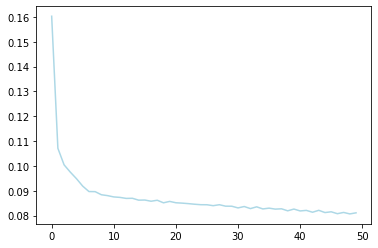

In [274]:
nodes = 800
device = ("cuda" if torch.cuda.is_available() else "cpu")
out_dim = 23*23*6
class model(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(529,nodes)
        self.fc2 = nn.Linear(nodes,nodes)
        self.fc3 = nn.Linear(nodes,nodes)
        self.fc4 = nn.Linear(nodes,nodes)
        self.fc5 = nn.Linear(nodes,nodes)
        self.fc6 = nn.Linear(nodes, out_dim)


    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        # x = self.fc3(x)
        # x = F.relu(x)
        # x = self.fc4(x)
        # x = F.relu(x) 
        # x = self.fc5(x)
        # x = F.relu(x)           
        x = self.fc6(x)
        return x

model = model().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()
losses = []
for epoch in range(25):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 30 == 29:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 30:.3f}')
            losses.append(running_loss / 30)
            running_loss = 0.0

plt.plot(losses, color= 'lightblue')
plt.show()  
# Evaluate on validation set
accuracy = 0

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        outputs = model(inputs)
        predicted = to_binary(outputs)
        difference = torch.abs(labels - predicted)
        for i in difference:
            accuracy += torch.sum(i) /(23*23*6)

# accuracy_val.append(1-accuracy/1000)                    
# accuracy_val

Plot accuracy over number of epochs

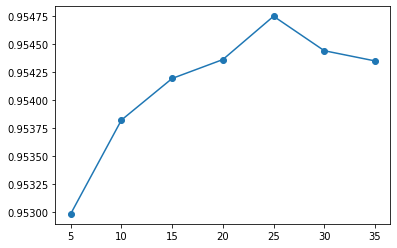

In [199]:
# x = [5,10,15,20,25,30,35]
# y = accuracy_val
# plt.plot(x,y, marker = 'o')


Plot accuracy over number of hidden layers

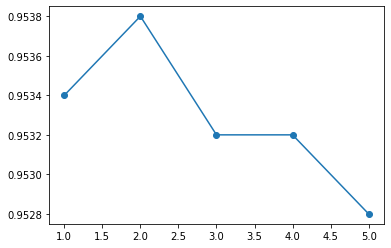

In [178]:
# x = [1,2,3,4,5]
# y = accuracy_val
# plt.plot(x,y, marker = 'o')


Plot accuracy over number of nodes per hidden layer

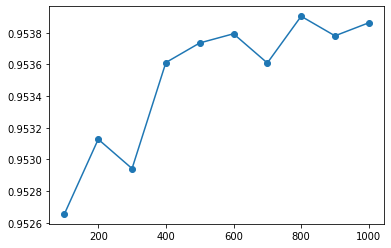

In [189]:
# x = [100,200,300,400,500,600,700,800,900,1000]
# y = accuracy_val
# plt.plot(x, y, marker = 'o')

## Evaluation on test data

In [275]:
error = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        predicted = to_binary(outputs)
        difference = torch.abs(labels - predicted)
        for i in difference:
            error += torch.sum(i) /(23*23*6)

        
print(1-error/2000)


tensor(0.9550, dtype=torch.float64)


Execution time by heuristic method

In [267]:
import time
start_time = time.time()
for i in range(10):
    solve_lp(matrices_lp[i])
print("--- %s seconds ---" % ((time.time() - start_time)/10))


--- 1.0421298027038575 seconds ---


Execution time by neural network method

In [268]:
start_time = time.time()
for i in range(10):
    x = model(inputs[i])
    torch.where(x>0, 1, 0)
print("--- %s seconds ---" % ((time.time() - start_time)/10))

--- 0.0017013788223266602 seconds ---
